In [1]:
#import python classes and packages
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
#loading CNN3D classes
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling3D, MaxPooling2D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras import layers
import numpy as np
import keras
import os
from keras.layers import Convolution2D
import pickle
from keras.layers import Bidirectional, GRU, Conv1D, MaxPooling1D, RepeatVector#loading GRU, bidriectional, and CNN
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [19]:
#defining class labels
labels = ['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing', 'Laying']

In [29]:
#loading UCI Har dataset captured activities from smart phones
X = pd.read_csv("Dataset/X_train.txt", header=None, delim_whitespace=True)
Y = pd.read_csv("Dataset/y_train.txt", header=None, delim_whitespace=True)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


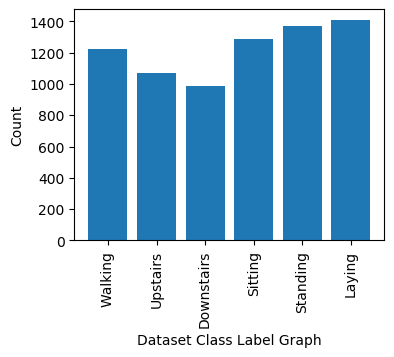

In [30]:
#visualizing class labels count found in dataset
names, count = np.unique(Y, return_counts = True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [31]:
#features processing, shuffling and splitting dataset into train and test
X = X.values
Y = Y.values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
Y = to_categorical(Y)
X = np.reshape(X, (X.shape[0], 17, 11, 3, 1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 5881
Testing Size (20%): 1471



In [32]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [33]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100     
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))    
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(4, 3)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [34]:
#train existing CNN algorithm which will use many parameters for training and can increase computation complexity
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], (X_train.shape[3] * X_train.shape[4])))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], (X_test.shape[3] * X_test.shape[4]))) 
cnn_model = Sequential()
#define cnn2d layer with 3 number of inout neurons and to filter dataset features
cnn_model.add(Convolution2D(3, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#collect filtered features from CNN2D layer
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another layer t further optimize features
cnn_model.add(Convolution2D(3, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#define output layer
cnn_model.add(Dense(units = 16, activation = 'relu'))
cnn_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train the model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 200, epochs = 20, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 17, 11, 3)         12        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 11, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 17, 11, 3)         12        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 11, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 561)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                8992      
_________________________________________________________________
dense_12 (Dense)             (None, 7)                

Existing CNN Model Accuracy  : 93.33786539768865
Existing CNN Model Precision   : 93.58573462031407
Existing CNN Model Recall      : 93.46466768051008
Existing CNN Model FMeasure    : 93.42584017393355


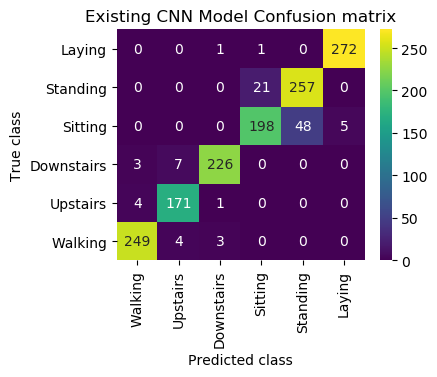

In [35]:
#perform prediction on human behaviour on test data using CNN existing model
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
calculateMetrics("Existing CNN Model", predict, y_test1)

In [36]:
#train propose CNN3D model which will optimize model using space-time (ST) interaction module
#of matrix operation and the depth separable convolution module. CNN3D is light in training whichreduces the 
#computational complexity of output weights and improves the compactness of the model structure. Propose algorithm also known
#as MDN or MCNN
#defining input shape
inputs = keras.Input((X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4]))
x = layers.Conv3D(filters=7, kernel_size=3, activation="relu")(inputs)#creating CNN3D layer with 7 neurons for data filter
x = layers.MaxPool3D(pool_size=1)(x) #pool layer to collect filterd features from CNN3D layer
x = layers.BatchNormalization()(x) #normalizing features
x = layers.Conv3D(filters=7, kernel_size=1, activation="relu")(x)#another layer to optimze module using space time
x = layers.MaxPool3D(pool_size=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv3D(filters=7, kernel_size=1, activation="relu")(x)
x = layers.MaxPool3D(pool_size=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv3D(filters=32, kernel_size=1, activation="relu")(x)#cnn layer for separable convolution module
x = layers.MaxPool3D(pool_size=1)(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling3D()(x)#defining global average pooling
x = layers.Dense(units=64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(units=y_train.shape[1], activation="softmax")(x)
mdn_model = keras.Model(inputs, outputs, name="3dcnn") #create model
mdn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#displaying propose model complexity
print(mdn_model.summary())
if os.path.exists("model/mdn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/mdn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = mdn_model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/mdn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    mdn_model.load_weights("model/mdn_weights.hdf5")

Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 17, 11, 3, 1)      0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 15, 9, 1, 7)       196       
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 15, 9, 1, 7)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 9, 1, 7)       28        
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 15, 9, 1, 7)       56        
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 15, 9, 1, 7)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 15, 9, 1, 7)       28    

Propose MDN Model Accuracy  : 94.90142760027193
Propose MDN Model Precision   : 94.80298846660179
Propose MDN Model Recall      : 95.00004552551997
Propose MDN Model FMeasure    : 94.78465229512811


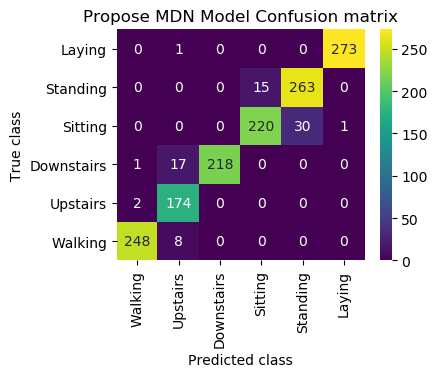

In [37]:
#perform prediction  on test data using propose MDN model
predict = mdn_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)#calculate metrics
calculateMetrics("Propose MDN Model", predict, y_test1)

In [38]:
#train extension hybrid model which is a combination ov CNN1 + Bidirectional + GRU and this model will optimize
#features using 3 differnet models which can help in better prediction accuracy
extension_model = Sequential()
extension_model.add(Convolution2D(2, (1 , 1), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
extension_model.add(MaxPooling2D(pool_size = (1, 1)))
extension_model.add(Convolution2D(1, (1, 1), activation = 'relu'))
extension_model.add(MaxPooling2D(pool_size = (1, 1)))
extension_model.add(Flatten())
extension_model.add(RepeatVector(2))
#adding bidirectional + GRU to CNN layer
extension_model.add(Bidirectional(GRU(1, activation = 'relu')))
extension_model.add(Dense(units = 1, activation = 'relu'))
extension_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train the model
extension_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(extension_model.summary()) 
if os.path.exists("model/extension_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/extension_weights.hdf5', verbose = 1, save_best_only = True)
    hist = extension_model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/extension_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    extension_model = load_model("model/extension_weights.hdf5")


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 17, 11, 2)         8         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 11, 2)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 17, 11, 1)         3         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 11, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 187)               0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 2, 187)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 2)                

Extension Hybrid Model CNN + GRU + Bidirectional Accuracy  : 96.87287559483345
Extension Hybrid Model CNN + GRU + Bidirectional Precision   : 97.18580664135382
Extension Hybrid Model CNN + GRU + Bidirectional Recall      : 97.01356688258346
Extension Hybrid Model CNN + GRU + Bidirectional FMeasure    : 97.04722561879203


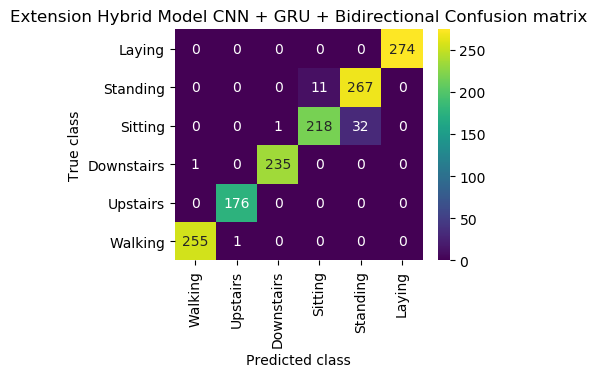

In [39]:
#perform prediction on test data using extension model
predict = extension_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
calculateMetrics("Extension Hybrid Model CNN + GRU + Bidirectional", predict, y_test1)

In [40]:
def values(filename, acc, loss):
    f = open(filename, 'rb')
    train_values = pickle.load(f)
    f.close()
    accuracy_value = train_values[acc]
    loss_value = train_values[loss]
    return accuracy_value, loss_value

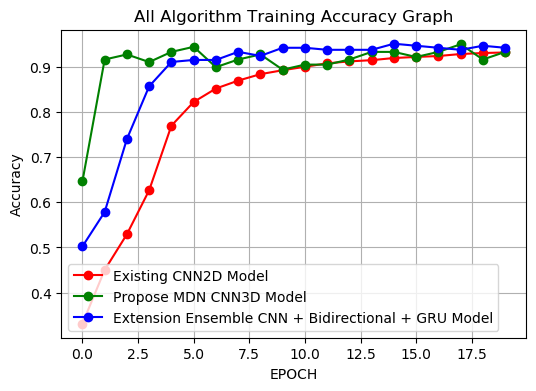

In [41]:
existing_acc, existing_loss = values("model/cnn_history.pckl", "accuracy", "loss")
propose_acc, propose_loss = values("model/mdn_history.pckl", "accuracy", "loss")
extension_acc, extension_loss = values("model/extension_history.pckl", "accuracy", "loss")
    
plt.figure(figsize=(6,4))
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('Accuracy')
plt.plot(existing_acc, 'ro-', color = 'red')
plt.plot(propose_acc, 'ro-', color = 'green')
plt.plot(extension_acc, 'ro-', color = 'blue')
plt.legend(['Existing CNN2D Model', 'Propose MDN CNN3D Model', 'Extension Ensemble CNN + Bidirectional + GRU Model'], loc='lower left')
plt.title('All Algorithm Training Accuracy Graph')
plt.show()

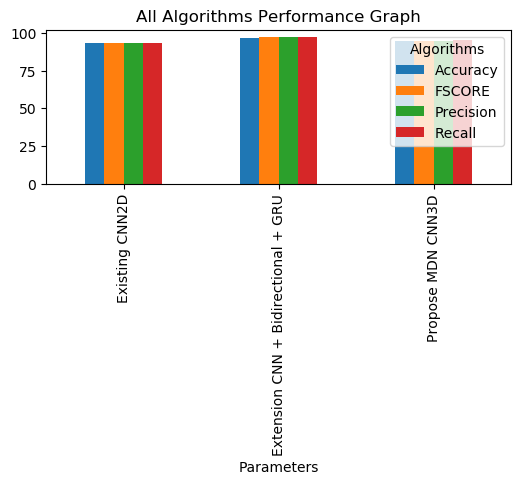

In [43]:
df = pd.DataFrame([['Existing CNN2D','Accuracy',accuracy[0]],['Existing CNN2D','Precision',precision[0]],['Existing CNN2D','Recall',recall[0]],['Existing CNN2D','FSCORE',fscore[0]],
                   ['Propose MDN CNN3D','Accuracy',accuracy[1]],['Propose MDN CNN3D','Precision',precision[1]],['Propose MDN CNN3D','Recall',recall[1]],['Propose MDN CNN3D','FSCORE',fscore[1]],
                   ['Extension CNN + Bidirectional + GRU','Accuracy',accuracy[2]],['Extension CNN + Bidirectional + GRU','Precision',precision[2]],['Extension CNN + Bidirectional + GRU','Recall',recall[2]],['Extension CNN + Bidirectional + GRU','FSCORE',fscore[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6, 2))
plt.title("All Algorithms Performance Graph")
plt.show()

In [44]:
#display all algorithm performnace
algorithms = ['Existing CNN2D Model', 'Propose MDN CNN3D', 'Extension Hybrid CNN + Bidirectional + GRU Model']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data    

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Existing CNN2D Model,93.337865,93.585735,93.464668,93.425840
1,Propose MDN CNN3D,94.901428,94.802988,95.000046,94.784652
2,Extension Hybrid CNN + Bidirectional + GRU Model,96.872876,97.185807,97.013567,97.047226


In [59]:
#loading test behaviour data
testData = pd.read_csv("Dataset/X_test.txt", header=None, delim_whitespace=True)
testData = testData.values
indices = np.arange(testData.shape[0])
np.random.shuffle(indices)#shuffling test data to select random 10 records
testData = testData[indices]
testData = testData[0:10,0:testData.shape[1]]#select 10 records
testData1 = np.reshape(testData, (testData.shape[0], 17, 11, 3)) #convert test data as per CNN model
predict = extension_model.predict(testData1)#perform prediction on test dtaa
for i in range(len(predict)):
    pred = np.argmax(predict[i])
    print("Test Data : "+str(testData[i][0:30])+" Predicted Activity ===> "+labels[pred-1]+"\n")

Test Data : [ 0.28008602 -0.01635867 -0.10825117 -0.99492268 -0.98288454 -0.96720345
 -0.99542872 -0.98183758 -0.96535501 -0.93672818 -0.5694064  -0.80282975
  0.8461184   0.68774857  0.82947703 -0.9849843  -0.9999645  -0.99987755
 -0.99906323 -0.99537075 -0.98262514 -0.96306588 -0.54744428 -0.56341673
 -0.37817963  0.2738687  -0.0969558   0.09472723  0.0656154   0.21101292] Predicted Activity ===> Standing

Test Data : [ 0.25854868 -0.03295751 -0.07983694 -0.94612869 -0.884968   -0.91949304
 -0.96192131 -0.92194522 -0.93771352 -0.79892298 -0.47864893 -0.74335247
  0.761199    0.55993976  0.72176808 -0.9331412  -0.99825327 -0.99659775
 -0.99482814 -0.97354438 -0.96275079 -0.94524443 -0.37995875 -0.65145625
  0.02734375 -0.28082858  0.37673983 -0.09994524 -0.0038699   0.14812563] Predicted Activity ===> Laying

Test Data : [ 0.29260006 -0.00325015 -0.03377316 -0.97298785 -0.90287042 -0.82220916
 -0.9752896  -0.89908124 -0.81123302 -0.89726001 -0.50046112 -0.67242464
  0.83326679  0.6722